In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

In [2]:
data = pd.read_csv('/Users/nguyenthiduy/Downloads/Khái Phá dữ liệu hiệ đại- MovieLEns/dataset/IMDB Dataset.csv')
data

review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]

In [3]:
data['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [4]:
data.dropna(inplace=True)
data

review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]

In [5]:
def clean_review(review):
    str= ' '.join(word for word in review.split() if word.lower() not in stopwords.words('english'))
    return str

In [6]:
data['review']= data['review'].apply(clean_review)

In [7]:
#word Cloud

from wordcloud import WordCloud

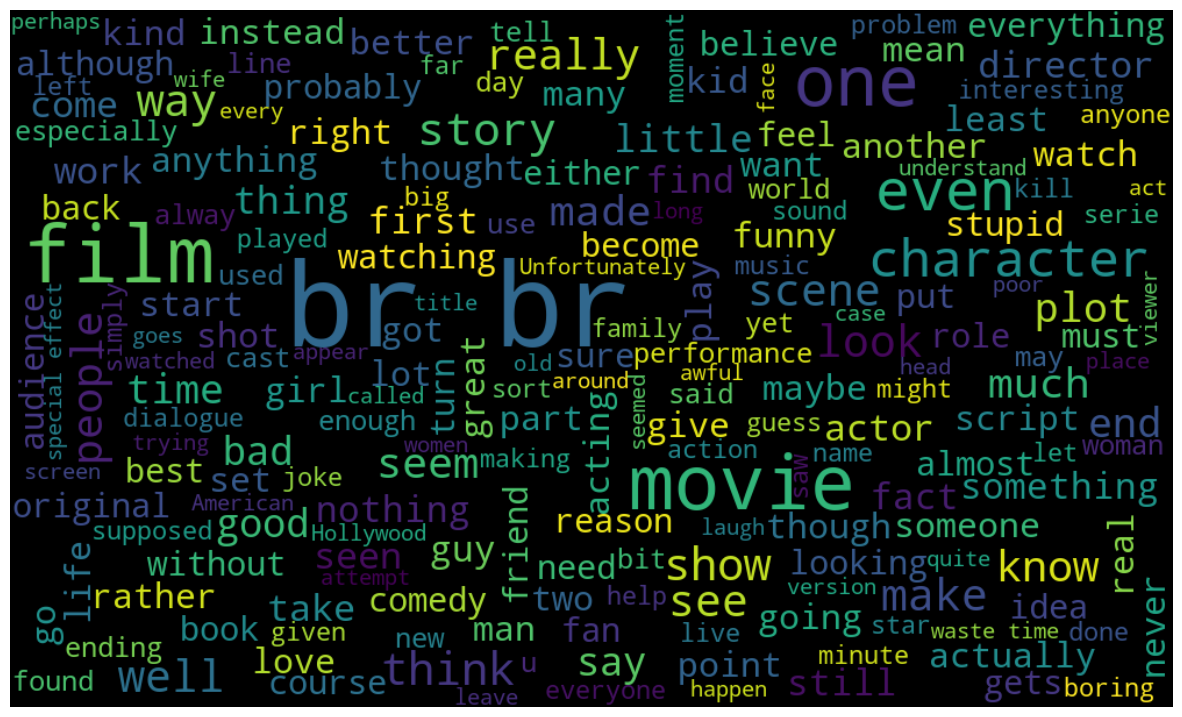

In [8]:
#draw WordCloud
reviews = ' '.join(word for word in data['review'][data['sentiment'] =='negative'].astype(str))
wordcloud = WordCloud(height=600, width=1000, max_font_size=100)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

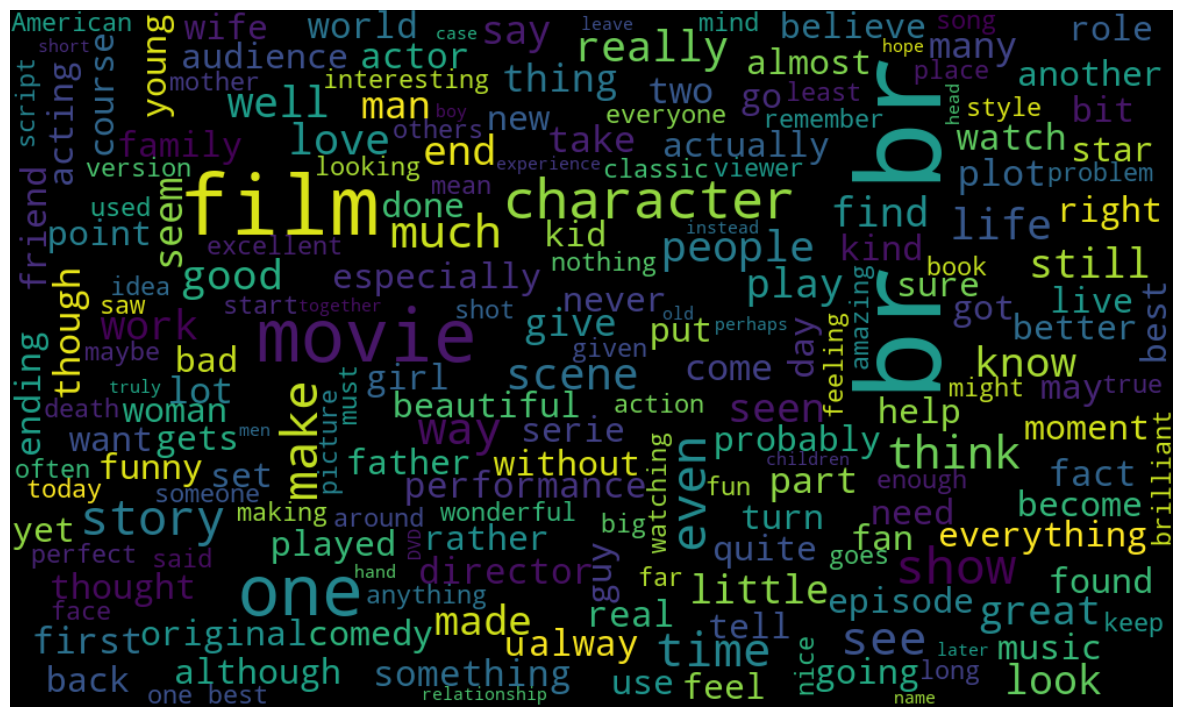

In [9]:
#draw WordCloud
reviews = ' '.join(word for word in data['review'][data['sentiment'] =='positive'].astype(str))
wordcloud = WordCloud(height=600, width=1000, max_font_size=100)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv= TfidfVectorizer(max_features=25000)

In [12]:
reviews=cv.fit_transform(data['review']).toarray()

In [13]:
data['sentiment']=data['sentiment'].replace(['positive','negative'],[1,0])

In [14]:
data['sentiment'].value_counts()

1    25000
0    25000
Name: sentiment, dtype: int64

# Build Model Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNBs
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [16]:
# Gán mô hình vào vào biến
model= LogisticRegression()


In [17]:
# Chia tập data thành train và test với 80% cho train và 20% cho test
reviews_train, reviews_test, sent_train, sent_test= train_test_split(reviews, data['sentiment'],train_size=0.8)

In [21]:
# fit tập train vào model để huấn luyện
model.fit(reviews_train,sent_train)

LogisticRegression()

In [ ]:
# dự đoán accuracy độ chính xác của mô hình
predict = model.predict(reviews_test)
ogreg_acc = accuracy_score(predict, sent_test)
print("Test accuracy: {:.2f}%".format(ogreg_acc*100))

Test accuracy: 90.21%


In [ ]:
# xây dựng confusion matrix và classification report
print(confusion_matrix(sent_test,predict))
print("\n")
print(classification_report(sent_test,predict))

[[4463  553]
 [ 426 4558]]


              precision    recall  f1-score   support

           0       0.91      0.89      0.90      5016
           1       0.89      0.91      0.90      4984

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



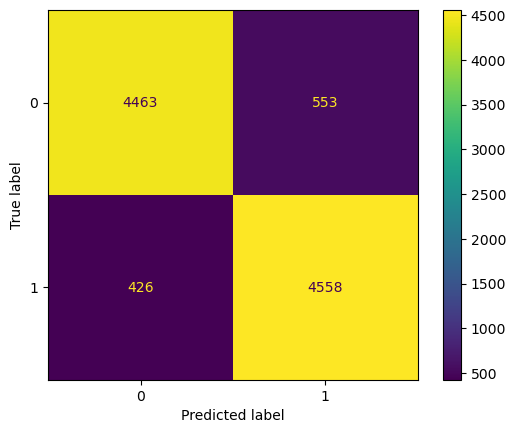

In [ ]:
# confusion matrix

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm =confusion_matrix(sent_test, predict,labels= model.classes_)
display= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
display.plot()
plt.show()

# Navie Bayes

In [ ]:
# gọi thư viện model Navie Bayes
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# Gọi biến gán model và huyến luyện mô hình
nb_model = MultinomialNB()
nb_model.fit(reviews_train,sent_train)

MultinomialNB()

In [ ]:
nb_pre = nb_model.predict(reviews_test)
accuracy = accuracy_score(nb_pre, sent_test)
print("Test accuracy: {:.2f}%".format(accuracy*100))

Test accuracy: 86.93%


In [ ]:
print(confusion_matrix(sent_test,nb_pre))
print("\n")
print(classification_report(sent_test,nb_pre))

[[4394  622]
 [ 685 4299]]


              precision    recall  f1-score   support

           0       0.87      0.88      0.87      5016
           1       0.87      0.86      0.87      4984

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



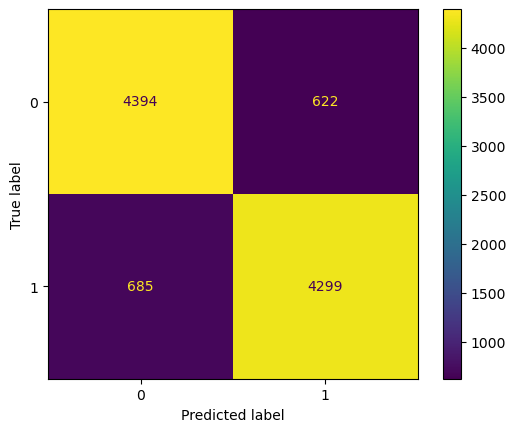

In [ ]:

nb_cm =confusion_matrix(sent_test, nb_pre,labels= model.classes_)
display= ConfusionMatrixDisplay(confusion_matrix=nb_cm, display_labels=model.classes_)
display.plot()
plt.show()

In [ ]:
import pickle as pk
pk.dump(model,open('model.pkl', 'wb'))

In [ ]:
pk.dump(cv,open('scaler.pkl','wb'))